### PYTHON NETWORK INTRUSION DETECTION CASE STUDY - shubhamjainxyz@gmail.com

## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter

In [3]:
path = 'C:/Users/shubh/Desktop/ALABS PYTHON CASE STUDIES/case studies/network intrusion detection/'

## IMPORTING DATASETS

In [4]:
attack_back                = pd.read_csv(path + 'Data_of_Attack_Back.csv') 
attack_back_bufferoverflow = pd.read_csv(path + 'Data_of_Attack_Back_BufferOverflow.csv') 
attack_back_ftpwrite       = pd.read_csv(path + 'Data_of_Attack_Back_FTPWrite.csv')
attack_back_guesspassword  = pd.read_csv(path + 'Data_of_Attack_Back_GuessPassword.csv')
attack_back_neptune        = pd.read_csv(path + 'Data_of_Attack_Back_Neptune.csv')
attack_back_nmap           = pd.read_csv(path + 'Data_of_Attack_Back_NMap.csv')
attack_back_normal         = pd.read_csv(path + 'Data_of_Attack_Back_Normal.csv')
attack_back_portsweep      = pd.read_csv(path + 'Data_of_Attack_Back_PortSweep.csv')
attack_back_rootkit        = pd.read_csv(path + 'Data_of_Attack_Back_RootKit.csv')
attack_back_satan          = pd.read_csv(path + 'Data_of_Attack_Back_Satan.csv')
attack_back_smurf          = pd.read_csv(path + 'Data_of_Attack_Back_Smurf.csv')

In [5]:
# REMOVING WHITE SPACES FROM COLUMN NAMES
feature_names = attack_back.columns.str.replace(' ', '')
feature_names

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')

In [6]:
# GETTING A LIST OF FEATURE NAMES(INDEPENDENT VARIABLES)
independent_variables = feature_names.difference(['flag'])
independent_variables

Index(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_rerror_rate',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'dst_host_srv_rerror_rate',
       'dst_host_srv_serror_rate', 'duration', 'hot', 'is_guest_login',
       'is_host_login', 'land', 'logged_in', 'num_access_files',
       'num_compromised', 'num_failed_logins', 'num_file_creations',
       'num_outbound_cmds', 'num_root', 'num_shells', 'protocol_type',
       'rerror_rate', 'root_shell', 'same_srv_rate', 'serror_rate', 'service',
       'src_bytes', 'srv_count', 'srv_diff_host_rate', 'srv_error_rate',
       'srv_rerror_rate', 'su_attempted', 'urgent', 'wrong_fragment'],
      dtype='object')

In [7]:
# REPLACING COLUMNS NAMES WITH CLEANED COLUMN NAMES
attack_back.columns = feature_names
attack_back_bufferoverflow.columns = feature_names
attack_back_ftpwrite.columns = feature_names
attack_back_guesspassword.columns = feature_names
attack_back_neptune.columns = feature_names
attack_back_nmap.columns = feature_names
attack_back_normal.columns = feature_names
attack_back_portsweep.columns = feature_names
attack_back_rootkit.columns = feature_names
attack_back_satan.columns = feature_names
attack_back_smurf.columns = feature_names

#### ENCODING FLAG VARIABLE INTO ANOMALY VARIABLE FOR ALL DATASETS WHERE 1 : ATTACK  0 : NORMAL

### attack_back

In [8]:
attack_back['flag'].value_counts()

0.00    871
0.08     90
0.01      5
0.02      2
Name: flag, dtype: int64

In [9]:
attack_back['anomaly'] = np.where(attack_back['flag'] > 0, 1, 0)

In [10]:
attack_back['anomaly'].value_counts()

0    871
1     97
Name: anomaly, dtype: int64

In [11]:
# BALANCING DATASET USING OVERSAMPLING
over_sampler = RandomOverSampler(random_state = 123, sampling_strategy = 1)

In [12]:
print(Counter(attack_back['anomaly']))
x, y = over_sampler.fit_resample(attack_back[independent_variables], attack_back['anomaly'])
print(Counter(y))

Counter({0: 871, 1: 97})
Counter({0: 871, 1: 871})


In [13]:
attack_back = pd.concat([x, y], axis = 1)
attack_back

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,service,src_bytes,srv_count,srv_diff_host_rate,srv_error_rate,srv_rerror_rate,su_attempted,urgent,wrong_fragment,anomaly
0,0.001,0.0,0.08314,0.001,0,0.000,0.100,0.1,0.000,0.001,...,0,0.54540,0.002,0.100,0.0,0.050,0,0,0,0
1,0.002,0.0,0.08314,0.002,0,0.000,0.050,0.1,0.000,0.002,...,0,0.54540,0.003,0.067,0.0,0.033,0,0,0,0
2,0.003,0.0,0.08314,0.003,0,0.000,0.033,0.1,0.000,0.003,...,0,0.54540,0.004,0.050,0.0,0.025,0,0,0,0
3,0.004,0.0,0.08314,0.004,0,0.000,0.025,0.1,0.000,0.004,...,0,0.54540,0.004,0.000,0.0,0.000,0,0,0,0
4,0.004,0.0,0.08314,0.005,0,0.000,0.020,0.1,0.000,0.005,...,0,0.54540,0.004,0.000,0.0,0.000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,0.005,0.0,0.08314,0.213,0,0.006,0.000,0.1,0.000,0.213,...,0,0.54540,0.005,0.000,0.0,0.020,0,0,0,1
1738,0.004,0.0,0.08315,0.255,0,0.003,0.000,0.1,0.000,0.255,...,0,0.22224,0.004,0.000,0.0,0.025,0,0,0,1
1739,0.004,0.0,0.08314,0.255,0,0.004,0.001,0.1,0.001,0.255,...,0,0.54540,0.006,0.050,0.0,0.067,0,0,0,1
1740,0.003,0.0,0.04380,0.003,0,0.100,0.033,0.1,0.000,0.003,...,0,0.51100,0.003,0.000,0.0,0.100,0,0,0,1


In [14]:
attack_back.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1742 entries, 0 to 1741
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   count                        1742 non-null   float64
 1   diff_srv_rate                1742 non-null   float64
 2   dst_bytes                    1742 non-null   float64
 3   dst_host_count               1742 non-null   float64
 4   dst_host_diff_srv_rate       1742 non-null   int64  
 5   dst_host_rerror_rate         1742 non-null   float64
 6   dst_host_same_src_port_rate  1742 non-null   float64
 7   dst_host_same_srv_rate       1742 non-null   float64
 8   dst_host_serror_rate         1742 non-null   float64
 9   dst_host_srv_count           1742 non-null   float64
 10  dst_host_srv_diff_host_rate  1742 non-null   int64  
 11  dst_host_srv_rerror_rate     1742 non-null   float64
 12  dst_host_srv_serror_rate     1742 non-null   float64
 13  duration          

### attack_back_bufferoverflow

In [15]:
attack_back_bufferoverflow['flag'].value_counts()

0.00    29
0.06     1
Name: flag, dtype: int64

In [16]:
attack_back_bufferoverflow['anomaly'] = np.where(attack_back_bufferoverflow['flag'] > 0, 1, 0)

In [17]:
# BALANCING DATASET USING OVERSAMPLING
over_sampler = RandomOverSampler(random_state = 123, sampling_strategy = 1)

In [18]:
print(Counter(attack_back_bufferoverflow['anomaly']))
x, y = over_sampler.fit_resample(attack_back_bufferoverflow[independent_variables], attack_back_bufferoverflow['anomaly'])
print(Counter(y))

Counter({0: 29, 1: 1})
Counter({0: 29, 1: 29})


In [19]:
attack_back_bufferoverflow = pd.concat([x, y], axis = 1)
attack_back_bufferoverflow

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,service,src_bytes,srv_count,srv_diff_host_rate,srv_error_rate,srv_rerror_rate,su_attempted,urgent,wrong_fragment,anomaly
0,0.001,0.000,0.02957,0.001,0,0.000,0.100,0.1,0,0.003,...,0.05,0.01511,0.001,0,0,0.0,0,0,0,0
1,0.001,0.000,0.02766,0.002,0,0.000,0.050,0.1,0,0.004,...,0.05,0.01735,0.001,0,0,0.0,0,0,0,0
2,0.001,0.000,0.06707,0.001,0,0.000,0.100,0.1,0,0.001,...,0.05,0.01587,0.001,0,0,0.0,0,0,0,0
3,0.001,0.000,0.04551,0.001,0,0.000,0.100,0.1,0,0.001,...,0.05,0.02328,0.001,0,0,0.0,0,0,0,0
4,0.001,0.000,0.03095,0.002,0,0.000,0.050,0.1,0,0.002,...,0.05,0.01567,0.001,0,0,0.0,0,0,0,0
5,0.001,0.000,0.16771,0.001,0,0.000,0.100,0.1,0,0.001,...,0.05,0.06274,0.001,0,0,0.0,0,0,0,0
6,0.001,0.000,0.03860,0.002,0,0.000,0.050,0.1,0,0.002,...,0.05,0.02628,0.001,0,0,0.0,0,0,0,0
7,0.001,0.000,0.05690,0.001,0,0.000,0.100,0.1,0,0.001,...,0.14,0.00000,0.001,0,0,0.0,0,0,0,0
8,0.002,0.000,0.05828,0.002,0,0.000,0.100,0.1,0,0.002,...,0.14,0.00000,0.002,0,0,0.0,0,0,0,0
9,0.003,0.000,0.05020,0.003,0,0.000,0.100,0.1,0,0.003,...,0.14,0.00000,0.003,0,0,0.0,0,0,0,0


In [20]:
attack_back_bufferoverflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   count                        58 non-null     float64
 1   diff_srv_rate                58 non-null     float64
 2   dst_bytes                    58 non-null     float64
 3   dst_host_count               58 non-null     float64
 4   dst_host_diff_srv_rate       58 non-null     int64  
 5   dst_host_rerror_rate         58 non-null     float64
 6   dst_host_same_src_port_rate  58 non-null     float64
 7   dst_host_same_srv_rate       58 non-null     float64
 8   dst_host_serror_rate         58 non-null     int64  
 9   dst_host_srv_count           58 non-null     float64
 10  dst_host_srv_diff_host_rate  58 non-null     float64
 11  dst_host_srv_rerror_rate     58 non-null     float64
 12  dst_host_srv_serror_rate     58 non-null     int64  
 13  duration              

### attack_back_ftpwrite

In [21]:
# AVOIDING THIS DATASET SINCE IT DOES NOT HAVE ANY ANOMALOUS OBSERVATION
attack_back_ftpwrite['flag'].value_counts()

0    8
Name: flag, dtype: int64

### attack_back_guesspassword

In [22]:
attack_back_guesspassword['flag'].value_counts()

0.06    45
0.08     4
0.03     2
0.00     2
Name: flag, dtype: int64

In [23]:
attack_back_guesspassword['anomaly'] = np.where(attack_back_guesspassword['flag'] > 0, 1, 0)

In [24]:
# BALANCING DATASET USING OVERSAMPLING
over_sampler = RandomOverSampler(random_state = 123, sampling_strategy = 1)

In [25]:
print(Counter(attack_back_guesspassword['anomaly']))
x, y = over_sampler.fit_resample(attack_back_guesspassword[independent_variables], attack_back_guesspassword['anomaly'])
print(Counter(y))

Counter({1: 51, 0: 2})
Counter({0: 51, 1: 51})


In [26]:
attack_back_guesspassword = pd.concat([x, y], axis = 1)
attack_back_guesspassword

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,service,src_bytes,srv_count,srv_diff_host_rate,srv_error_rate,srv_rerror_rate,su_attempted,urgent,wrong_fragment,anomaly
0,0.001,0,0.00276,0.001,0,0.000,0.100,0.1,0.000,0.002,...,0.05,0.00104,0.001,0,0.00,0.00,0,0,0,0
1,0.001,0,0.00179,0.001,0,0.000,0.100,0.1,0.100,0.001,...,0.05,0.00125,0.001,0,0.10,0.00,0,0,0,1
2,0.002,0,0.00179,0.002,0,0.050,0.050,0.1,0.050,0.002,...,0.05,0.00125,0.002,0,0.05,0.05,0,0,0,1
3,0.002,0,0.00179,0.003,0,0.067,0.033,0.1,0.033,0.003,...,0.05,0.00125,0.002,0,0.00,0.10,0,0,0,1
4,0.001,0,0.00179,0.004,0,0.075,0.025,0.1,0.025,0.004,...,0.05,0.00125,0.001,0,0.00,0.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.001,0,0.02053,0.052,0,0.094,0.002,0.1,0.004,0.052,...,0.05,0.00123,0.001,0,0.00,0.00,0,0,0,0
98,0.001,0,0.02053,0.052,0,0.094,0.002,0.1,0.004,0.052,...,0.05,0.00123,0.001,0,0.00,0.00,0,0,0,0
99,0.001,0,0.00276,0.001,0,0.000,0.100,0.1,0.000,0.002,...,0.05,0.00104,0.001,0,0.00,0.00,0,0,0,0
100,0.001,0,0.00276,0.001,0,0.000,0.100,0.1,0.000,0.002,...,0.05,0.00104,0.001,0,0.00,0.00,0,0,0,0


In [27]:
attack_back_guesspassword.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   count                        102 non-null    float64
 1   diff_srv_rate                102 non-null    int64  
 2   dst_bytes                    102 non-null    float64
 3   dst_host_count               102 non-null    float64
 4   dst_host_diff_srv_rate       102 non-null    int64  
 5   dst_host_rerror_rate         102 non-null    float64
 6   dst_host_same_src_port_rate  102 non-null    float64
 7   dst_host_same_srv_rate       102 non-null    float64
 8   dst_host_serror_rate         102 non-null    float64
 9   dst_host_srv_count           102 non-null    float64
 10  dst_host_srv_diff_host_rate  102 non-null    float64
 11  dst_host_srv_rerror_rate     102 non-null    float64
 12  dst_host_srv_serror_rate     102 non-null    float64
 13  duration            

### attack_back_neptune

In [28]:
attack_back_neptune['flag'].value_counts()

0.07    201447
0.05     23761
0.06      2019
0.00         1
Name: flag, dtype: int64

In [29]:
attack_back_neptune['anomaly'] = np.where(attack_back_neptune['flag'] > 0, 1, 0)

In [30]:
# DOWNSAMPLING attack_back_neptune SINCE OVERSAMPLING IS CREATING A COPY OF THE SINGLE OBSERVATION WHICH IS USELESS.
under_sampler = RandomUnderSampler(sampling_strategy = 0.000009, random_state = 123)

In [31]:
print(Counter(attack_back_neptune['anomaly']))
x, y = under_sampler.fit_resample(attack_back_neptune[independent_variables], attack_back_neptune['anomaly'])
print(Counter(y))

Counter({1: 227227, 0: 1})
Counter({1: 111111, 0: 1})


In [32]:
attack_back_neptune = pd.concat([x, y], axis = 1)
attack_back_neptune

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,service,src_bytes,srv_count,srv_diff_host_rate,srv_error_rate,srv_rerror_rate,su_attempted,urgent,wrong_fragment,anomaly
0,0.241,0.007,0.0088,0.255,0.007,0.1,0.0,0.000,0.0,0.001,...,0.01,0.10714,0.001,0.0,0.0,0.0,0,0,0,0
1,0.113,0.007,0.0000,0.255,0.006,0.0,0.0,0.004,0.1,0.009,...,0.12,0.00000,0.008,0.0,0.1,0.0,0,0,0,1
2,0.069,0.009,0.0000,0.255,0.007,0.0,0.0,0.008,0.1,0.021,...,0.12,0.00000,0.006,0.0,0.1,0.0,0,0,0,1
3,0.144,0.006,0.0000,0.255,0.006,0.0,0.0,0.000,0.1,0.001,...,0.12,0.00000,0.006,0.0,0.1,0.0,0,0,0,1
4,0.242,0.007,0.0000,0.255,0.007,0.1,0.0,0.002,0.0,0.005,...,0.12,0.00000,0.005,0.0,0.0,0.1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111107,0.234,0.007,0.0000,0.255,0.007,0.0,0.0,0.006,0.1,0.016,...,0.41,0.00000,0.016,0.0,0.1,0.0,0,0,0,1
111108,0.139,0.006,0.0000,0.255,0.006,0.0,0.0,0.007,0.1,0.017,...,0.12,0.00000,0.020,0.0,0.1,0.0,0,0,0,1
111109,0.272,0.006,0.0000,0.255,0.008,0.0,0.0,0.004,0.1,0.009,...,0.12,0.00000,0.010,0.0,0.1,0.0,0,0,0,1
111110,0.225,0.007,0.0000,0.255,0.007,0.1,0.0,0.002,0.0,0.005,...,0.12,0.00000,0.005,0.0,0.0,0.1,0,0,0,1


In [33]:
attack_back_neptune.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111112 entries, 0 to 111111
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   count                        111112 non-null  float64
 1   diff_srv_rate                111112 non-null  float64
 2   dst_bytes                    111112 non-null  float64
 3   dst_host_count               111112 non-null  float64
 4   dst_host_diff_srv_rate       111112 non-null  float64
 5   dst_host_rerror_rate         111112 non-null  float64
 6   dst_host_same_src_port_rate  111112 non-null  float64
 7   dst_host_same_srv_rate       111112 non-null  float64
 8   dst_host_serror_rate         111112 non-null  float64
 9   dst_host_srv_count           111112 non-null  float64
 10  dst_host_srv_diff_host_rate  111112 non-null  float64
 11  dst_host_srv_rerror_rate     111112 non-null  float64
 12  dst_host_srv_serror_rate     111112 non-null  float64
 13 

### attack_back_nmap

In [34]:
attack_back_nmap['flag'].value_counts()

0.0    1257
0.1     297
Name: flag, dtype: int64

In [35]:
attack_back_nmap['anomaly'] = np.where(attack_back_nmap['flag'] > 0, 1, 0)

In [36]:
# USING OVERSAMPLING TO BAANCE THIS DATASET
over_sampler = RandomOverSampler(sampling_strategy = 1, random_state = 123)

In [37]:
print(Counter(attack_back_nmap['anomaly']))
x, y = over_sampler.fit_resample(attack_back_nmap[independent_variables], attack_back_nmap['anomaly'])
print(Counter(y))

Counter({0: 1257, 1: 297})
Counter({0: 1257, 1: 1257})


In [38]:
attack_back_nmap = pd.concat([x, y], axis = 1)
attack_back_nmap

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,service,src_bytes,srv_count,srv_diff_host_rate,srv_error_rate,srv_rerror_rate,su_attempted,urgent,wrong_fragment,anomaly
0,0.001,0.0,0.0,0.003,0.100,0,0.033,0.033,0.000,0.001,...,0.06,0.00008,0.001,0.0,0.0,0,0,0,0,0
1,0.001,0.0,0.0,0.004,0.075,0,0.050,0.050,0.000,0.002,...,0.06,0.00008,0.001,0.0,0.0,0,0,0,0,0
2,0.001,0.0,0.0,0.005,0.060,0,0.060,0.060,0.000,0.003,...,0.06,0.00008,0.001,0.0,0.0,0,0,0,0,0
3,0.001,0.0,0.0,0.006,0.050,0,0.067,0.067,0.000,0.004,...,0.06,0.00008,0.001,0.0,0.0,0,0,0,0,0
4,0.001,0.0,0.0,0.007,0.043,0,0.071,0.071,0.000,0.005,...,0.06,0.00008,0.001,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509,0.001,0.0,0.0,0.081,0.088,0,0.090,0.001,0.090,0.001,...,0.12,0.00000,0.001,0.0,0.1,0,0,0,0,1
2510,0.001,0.0,0.0,0.226,0.096,0,0.096,0.000,0.096,0.001,...,0.12,0.00000,0.001,0.0,0.1,0,0,0,0,1
2511,0.001,0.0,0.0,0.028,0.071,0,0.071,0.004,0.071,0.001,...,0.12,0.00000,0.001,0.0,0.1,0,0,0,0,1
2512,0.001,0.0,0.0,0.243,0.095,0,0.097,0.000,0.097,0.001,...,0.12,0.00000,0.001,0.0,0.1,0,0,0,0,1


In [39]:
attack_back_nmap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   count                        2514 non-null   float64
 1   diff_srv_rate                2514 non-null   float64
 2   dst_bytes                    2514 non-null   float64
 3   dst_host_count               2514 non-null   float64
 4   dst_host_diff_srv_rate       2514 non-null   float64
 5   dst_host_rerror_rate         2514 non-null   int64  
 6   dst_host_same_src_port_rate  2514 non-null   float64
 7   dst_host_same_srv_rate       2514 non-null   float64
 8   dst_host_serror_rate         2514 non-null   float64
 9   dst_host_srv_count           2514 non-null   float64
 10  dst_host_srv_diff_host_rate  2514 non-null   float64
 11  dst_host_srv_rerror_rate     2514 non-null   int64  
 12  dst_host_srv_serror_rate     2514 non-null   float64
 13  duration          

### attack_back_normal

In [40]:
attack_back_normal['flag'].value_counts()

0.00    563777
0.05     11733
0.06       422
0.02       328
0.07       208
0.08       130
0.01        90
0.03        16
0.04         5
0.10         1
Name: flag, dtype: int64

In [41]:
attack_back_normal['anomaly'] = np.where(attack_back_normal['flag'] > 0, 1, 0)

In [42]:
# USING UNDERSAMPLING TO BALANCE THIS DATASET
under_sampler = RandomUnderSampler(sampling_strategy = 0.1, random_state = 123)

In [43]:
print(Counter(attack_back_normal['anomaly']))
x, y = under_sampler.fit_resample(attack_back_normal[independent_variables], attack_back_normal['anomaly'])
print(Counter(y))

Counter({0: 563777, 1: 12933})
Counter({0: 129330, 1: 12933})


In [44]:
attack_back_normal = pd.concat([x, y], axis = 1)
attack_back_normal

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,service,src_bytes,srv_count,srv_diff_host_rate,srv_error_rate,srv_rerror_rate,su_attempted,urgent,wrong_fragment,anomaly
0,0.001,0.0,0.00651,0.185,0.00,0.000,0.001,0.100,0.000,0.255,...,0.00,0.00215,0.002,0.100,0.0,0.000,0.0,0.0,0,0
1,0.002,0.0,0.00000,0.051,0.01,0.000,0.006,0.006,0.000,0.025,...,0.14,0.00383,0.002,0.000,0.0,0.000,0.0,0.0,0,0
2,0.020,0.0,0.00704,0.093,0.00,0.000,0.001,0.100,0.001,0.255,...,0.00,0.00211,0.045,0.011,0.0,0.000,0.0,0.0,0,0
3,0.001,0.0,0.09860,0.061,0.00,0.000,0.002,0.100,0.000,0.255,...,0.00,0.00213,0.009,0.022,0.0,0.000,0.0,0.0,0,0
4,0.025,0.0,0.00334,0.255,0.00,0.000,0.000,0.100,0.000,0.255,...,0.00,0.00209,0.029,0.014,0.0,0.000,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142258,0.001,0.0,0.00000,0.021,0.00,0.005,0.005,0.100,0.005,0.021,...,0.19,0.00000,0.001,0.000,0.1,0.000,0.0,0.0,0,1
142259,0.002,0.0,0.00000,0.022,0.00,0.005,0.009,0.100,0.009,0.022,...,0.19,0.00000,0.002,0.000,0.1,0.000,0.0,0.0,0,1
142260,0.003,0.0,0.00000,0.011,0.00,0.009,0.018,0.100,0.000,0.209,...,0.00,0.00000,0.003,0.000,0.0,0.033,0.0,0.0,0,1
142261,0.001,0.0,0.21900,0.001,0.00,0.000,0.100,0.100,0.100,0.230,...,0.00,0.00173,0.001,0.000,0.1,0.000,0.0,0.0,0,1


In [45]:
attack_back_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142263 entries, 0 to 142262
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   count                        142263 non-null  float64
 1   diff_srv_rate                142263 non-null  float64
 2   dst_bytes                    142263 non-null  float64
 3   dst_host_count               142263 non-null  float64
 4   dst_host_diff_srv_rate       142263 non-null  float64
 5   dst_host_rerror_rate         142263 non-null  float64
 6   dst_host_same_src_port_rate  142263 non-null  float64
 7   dst_host_same_srv_rate       142263 non-null  float64
 8   dst_host_serror_rate         142263 non-null  float64
 9   dst_host_srv_count           142263 non-null  float64
 10  dst_host_srv_diff_host_rate  142263 non-null  float64
 11  dst_host_srv_rerror_rate     142263 non-null  float64
 12  dst_host_srv_serror_rate     142263 non-null  float64
 13 

### attack_back_portsweep

In [46]:
attack_back_portsweep['flag'].value_counts()

0.08    1795
0.05     770
0.07     187
0.09     122
0.06      48
0.04      35
0.00       7
Name: flag, dtype: int64

In [47]:
attack_back_portsweep['anomaly'] = np.where(attack_back_portsweep['flag'] > 0, 1, 0)

In [48]:
# USING OVERSAMPLING TO BALANCE THIS DATASET
over_sampler = RandomOverSampler(sampling_strategy = 0.2, random_state = 123)

In [49]:
print(Counter(attack_back_portsweep['anomaly']))
x, y = over_sampler.fit_resample(attack_back_portsweep[independent_variables], attack_back_portsweep['anomaly'])
print(Counter(y))

Counter({1: 2957, 0: 7})
Counter({1: 2957, 0: 591})


In [50]:
attack_back_portsweep = pd.concat([x, y], axis = 1)
attack_back_portsweep

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,service,src_bytes,srv_count,srv_diff_host_rate,srv_error_rate,srv_rerror_rate,su_attempted,urgent,wrong_fragment,anomaly
0,0.001,0.000,0.00000,0.171,0.002,0.029,0.001,0.027,0.001,0.062,...,0.14,0.00000,0.001,0.0,0.0,0.1,0,0,0,1
1,0.002,0.000,0.00000,0.172,0.002,0.030,0.001,0.027,0.001,0.062,...,0.14,0.00000,0.002,0.0,0.0,0.1,0,0,0,1
2,0.003,0.067,0.00000,0.173,0.003,0.030,0.002,0.001,0.001,0.001,...,0.12,0.00000,0.001,0.0,0.0,0.1,0,0,0,1
3,0.004,0.050,0.00000,0.174,0.003,0.030,0.002,0.001,0.001,0.002,...,0.12,0.00000,0.002,0.0,0.0,0.1,0,0,0,1
4,0.005,0.060,0.00000,0.175,0.003,0.031,0.003,0.001,0.001,0.001,...,0.12,0.00000,0.001,0.0,0.0,0.1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543,0.001,0.000,0.00538,0.255,0.050,0.100,0.000,0.000,0.000,0.001,...,0.01,0.01273,0.001,0.0,0.0,0.0,0,0,0,0
3544,0.001,0.000,0.00000,0.255,0.008,0.001,0.009,0.001,0.053,0.002,...,0.06,0.00008,0.001,0.0,0.0,0.0,0,0,0,0
3545,0.001,0.000,0.00000,0.001,0.000,0.000,0.100,0.100,0.000,0.001,...,0.09,0.00008,0.001,0.0,0.0,0.0,0,0,0,0
3546,0.001,0.000,0.00000,0.227,0.003,0.001,0.001,0.001,0.000,0.030,...,0.06,0.00008,0.002,0.1,0.0,0.0,0,0,0,0


In [51]:
attack_back_portsweep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   count                        3548 non-null   float64
 1   diff_srv_rate                3548 non-null   float64
 2   dst_bytes                    3548 non-null   float64
 3   dst_host_count               3548 non-null   float64
 4   dst_host_diff_srv_rate       3548 non-null   float64
 5   dst_host_rerror_rate         3548 non-null   float64
 6   dst_host_same_src_port_rate  3548 non-null   float64
 7   dst_host_same_srv_rate       3548 non-null   float64
 8   dst_host_serror_rate         3548 non-null   float64
 9   dst_host_srv_count           3548 non-null   float64
 10  dst_host_srv_diff_host_rate  3548 non-null   float64
 11  dst_host_srv_rerror_rate     3548 non-null   float64
 12  dst_host_srv_serror_rate     3548 non-null   float64
 13  duration          

### attack_back_rootkit

In [52]:
# AVOIDING THIS DATASET SINCE IT DOES NOT HAVE ANY ANOMALOUS ACTIVITY
attack_back_rootkit['flag'].value_counts()

0    10
Name: flag, dtype: int64

### attack_back_satan

In [53]:
# USING THIS DATA AS IT IS SINCE IT IS BALANCED
attack_back_satan['flag'].value_counts()

0.05    2315
0.00    1850
0.07     843
0.06       6
0.01       2
0.02       1
0.08       1
0.03       1
Name: flag, dtype: int64

In [54]:
attack_back_satan['anomaly'] = np.where(attack_back_satan['flag'] > 0, 1, 0)

In [55]:
attack_back_satan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5019 entries, 0 to 5018
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     5019 non-null   float64
 1   protocol_type                5019 non-null   float64
 2   service                      5019 non-null   float64
 3   flag                         5019 non-null   float64
 4   src_bytes                    5019 non-null   float64
 5   dst_bytes                    5019 non-null   float64
 6   land                         5019 non-null   int64  
 7   wrong_fragment               5019 non-null   int64  
 8   urgent                       5019 non-null   int64  
 9   hot                          5019 non-null   float64
 10  num_failed_logins            5019 non-null   float64
 11  logged_in                    5019 non-null   float64
 12  num_compromised              5019 non-null   float64
 13  root_shell        

### attack_back_smurf

In [56]:
# AVOIDING THIS DATASET SINCE IT DOES NOT HAVE ANY ANOMALOUS ACTIVITY
attack_back_smurf['flag'].value_counts()

0    3007
Name: flag, dtype: int64

### CONCATENATING ALL THE BALANCED DATASETS

In [57]:
network_intrusion = pd.concat([attack_back, attack_back_bufferoverflow, attack_back_guesspassword, attack_back_neptune, attack_back_nmap, attack_back_normal, attack_back_portsweep, attack_back_satan], axis = 0)

In [58]:
network_intrusion

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,src_bytes,srv_count,srv_diff_host_rate,srv_error_rate,srv_rerror_rate,su_attempted,urgent,wrong_fragment,anomaly,flag
0,0.001,0.0,0.08314,0.001,0.000,0.000,0.100,0.100,0.000,0.001,...,0.54540,0.002,0.100,0.0,0.050,0.0,0.0,0,0,NaN
1,0.002,0.0,0.08314,0.002,0.000,0.000,0.050,0.100,0.000,0.002,...,0.54540,0.003,0.067,0.0,0.033,0.0,0.0,0,0,NaN
2,0.003,0.0,0.08314,0.003,0.000,0.000,0.033,0.100,0.000,0.003,...,0.54540,0.004,0.050,0.0,0.025,0.0,0.0,0,0,NaN
3,0.004,0.0,0.08314,0.004,0.000,0.000,0.025,0.100,0.000,0.004,...,0.54540,0.004,0.000,0.0,0.000,0.0,0.0,0,0,NaN
4,0.004,0.0,0.08314,0.005,0.000,0.000,0.020,0.100,0.000,0.005,...,0.54540,0.004,0.000,0.0,0.000,0.0,0.0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5014,0.001,0.0,0.00000,0.212,0.076,0.062,0.001,0.001,0.003,0.003,...,0.00020,0.001,0.000,0.0,0.000,0.0,0.0,0,0,0.0
5015,0.002,0.0,0.00000,0.213,0.076,0.062,0.002,0.002,0.003,0.004,...,0.00020,0.002,0.000,0.0,0.000,0.0,0.0,0,0,0.0
5016,0.001,0.0,0.00000,0.063,0.008,0.002,0.003,0.002,0.000,0.001,...,0.00020,0.001,0.000,0.0,0.000,0.0,0.0,0,0,0.0
5017,0.001,0.0,0.00000,0.064,0.008,0.002,0.005,0.003,0.000,0.002,...,0.00020,0.001,0.000,0.0,0.000,0.0,0.0,0,0,0.0


In [59]:
network_intrusion['anomaly'].value_counts()

0    133980
1    132378
Name: anomaly, dtype: int64

In [60]:
network_intrusion.drop(['flag'], axis = 1, inplace = True)

## UDF TO CREATE UNIVARIATE ANALYSIS

In [61]:
# UDF TO CREATE UNIVARIATE ANALYSIS FOR NUMERICAL FEATURES
def univariate_analysis(x) :
    
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(), x.std(), x.var(), 
                      x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.1), x.quantile(0.25), 
                      x.quantile(0.5), x.quantile(0.75), x.quantile(0.9), x.quantile(0.95), x.quantile(0.99), x.max()],
                      index = ['N', 'NMISS', 'TOTAL SUM', 'MEAN', 'MEDIAN', 'STDEV', 'VAR', 'MIN', 'P1', 'P5', 'P10', 'P25',
                               'P50', 'P75', 'P90', 'P95', 'P99', 'MAX'])

In [62]:
univ_analysis = network_intrusion.apply(univariate_analysis).T
univ_analysis.to_csv(path + 'univ_analysis.csv')

In [63]:
network_intrusion.apply(univariate_analysis).T

,N,NMISS,TOTAL SUM,MEAN,MEDIAN,STDEV,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
count,266358.0,0.0,22665.16000,0.085093,0.01800,0.104211,0.010860,0.0,0.001,0.001,0.001,0.003,0.01800,0.14600,0.250000,0.27600,0.300000,0.511
diff_srv_rate,266358.0,0.0,1307.63000,0.004909,0.00000,0.013719,0.000188,0.0,0.000,0.000,0.000,0.000,0.00000,0.00600,0.007000,0.00800,0.100000,0.100
dst_bytes,266358.0,0.0,4841.46510,0.018177,0.00000,0.057355,0.003290,0.0,0.000,0.000,0.000,0.000,0.00000,0.01168,0.046803,0.09284,0.259864,1.000
dst_host_count,266358.0,0.0,48534.36200,0.182215,0.25500,0.099706,0.009941,0.0,0.001,0.005,0.014,0.076,0.25500,0.25500,0.255000,0.25500,0.255000,0.255
dst_host_diff_srv_rate,266358.0,0.0,1536.06100,0.005767,0.00300,0.013810,0.000191,0.0,0.000,0.000,0.000,0.000,0.00300,0.00700,0.008000,0.00900,0.100000,0.100
dst_host_rerror_rate,266358.0,0.0,2968.86800,0.011146,0.00000,0.030537,0.000933,0.0,0.000,0.000,0.000,0.000,0.00000,0.00000,0.085000,0.10000,0.100000,0.100
dst_host_same_src_port_rate,266358.0,0.0,1771.98100,0.006653,0.00000,0.019454,0.000378,0.0,0.000,0.000,0.000,0.000,0.00000,0.00200,0.017000,0.05000,0.100000,0.100
dst_host_same_srv_rate,266358.0,0.0,14002.78300,0.052571,0.06100,0.046513,0.002163,0.0,0.000,0.001,0.002,0.004,0.06100,0.10000,0.100000,0.10000,0.100000,0.100
dst_host_serror_rate,266358.0,0.0,10051.98100,0.037739,0.00000,0.048185,0.002322,0.0,0.000,0.000,0.000,0.000,0.00000,0.10000,0.100000,0.10000,0.100000,0.100
dst_host_srv_count,266358.0,0.0,33218.24100,0.124713,0.07500,0.116410,0.013551,0.0,0.001,0.002,0.004,0.010,0.07500,0.25500,0.255000,0.25500,0.255000,0.255


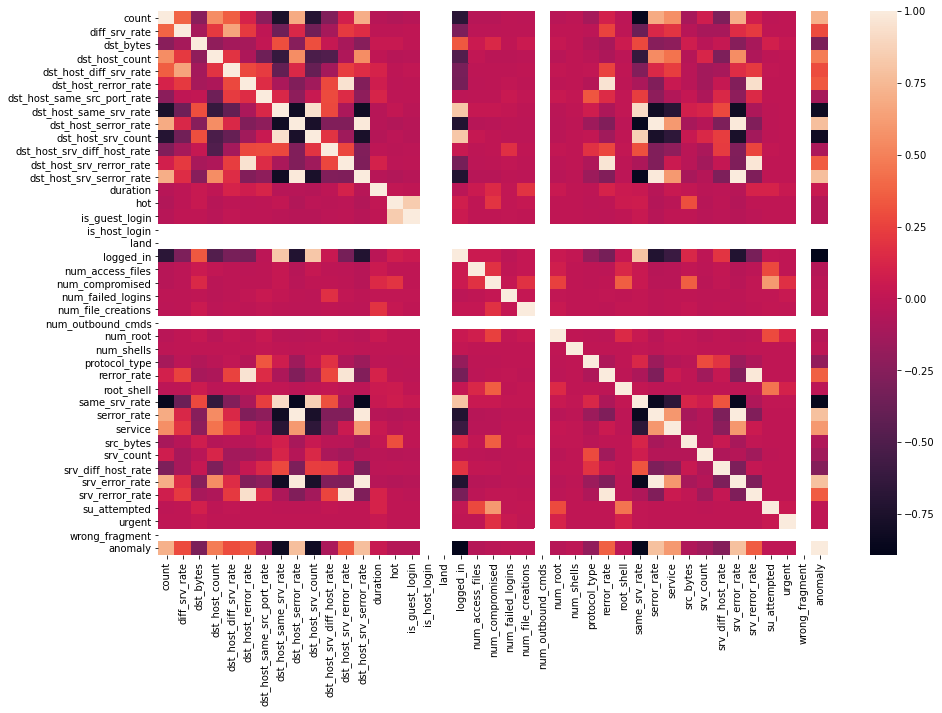

In [64]:
plt.figure(figsize = (15, 10))
sns.heatmap(network_intrusion.corr())
plt.show()

In [65]:
corr_matrix = network_intrusion.corr()
corr_matrix.to_csv(path + 'corr_matrix.csv')

In [66]:
network_intrusion.corr()

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,service,src_bytes,srv_count,srv_diff_host_rate,srv_error_rate,srv_rerror_rate,su_attempted,urgent,wrong_fragment,anomaly
count,1.000000,0.382564,-0.236831,0.550724,0.359633,0.107842,-0.232157,-0.752378,0.687989,-0.704484,...,0.560920,-0.103246,0.071721,-0.288445,0.697627,0.076776,-0.007002,-0.002967,NaN,0.718608
diff_srv_rate,0.382564,1.000000,-0.109507,0.219849,0.653612,0.222783,-0.002607,-0.356990,0.132984,-0.340573,...,0.200658,-0.038632,-0.104029,-0.104736,0.160559,0.217870,-0.003105,-0.001316,NaN,0.290131
dst_bytes,-0.236831,-0.109507,1.000000,-0.207690,-0.121981,-0.109473,0.012713,0.301804,-0.245504,0.302797,...,-0.212918,0.073295,-0.029119,0.031754,-0.242271,-0.102619,0.087523,0.027965,NaN,-0.295928
dst_host_count,0.550724,0.219849,-0.207690,1.000000,0.194355,-0.079821,-0.358387,-0.618651,0.552324,-0.515879,...,0.439561,-0.047151,0.123017,-0.291534,0.549912,-0.076580,-0.007925,-0.002291,NaN,0.477901
dst_host_diff_srv_rate,0.359633,0.653612,-0.121981,0.194355,1.000000,0.278659,0.231557,-0.404091,0.136208,-0.390571,...,0.232201,-0.033954,-0.123507,-0.103991,0.162841,0.223931,0.003338,-0.000249,NaN,0.296827
dst_host_rerror_rate,0.107842,0.222783,-0.109473,-0.079821,0.278659,1.000000,0.158340,-0.085857,-0.277024,-0.135902,...,0.044291,-0.027492,-0.127482,0.027362,-0.267145,0.940567,-0.002008,-0.001342,NaN,0.339931
dst_host_same_src_port_rate,-0.232157,-0.002607,0.012713,-0.358387,0.231557,0.158340,1.000000,0.129162,-0.218510,0.041015,...,-0.062877,0.022952,-0.080729,0.142420,-0.214331,0.150515,-0.002111,-0.001005,NaN,-0.108368
dst_host_same_srv_rate,-0.752378,-0.356990,0.301804,-0.618651,-0.404091,-0.085857,0.129162,1.000000,-0.807254,0.948072,...,-0.687011,0.090183,0.115458,0.282835,-0.805796,-0.079171,-0.006897,-0.004043,NaN,-0.824160
dst_host_serror_rate,0.687989,0.132984,-0.245504,0.552324,0.136208,-0.277024,-0.218510,-0.807254,1.000000,-0.761395,...,0.601717,-0.103908,-0.045369,-0.286286,0.990613,-0.274822,-0.005408,-0.002778,NaN,0.782327
dst_host_srv_count,-0.704484,-0.340573,0.302797,-0.515879,-0.390571,-0.135902,0.041015,0.948072,-0.761395,1.000000,...,-0.659189,0.038499,0.140410,0.237831,-0.760066,-0.128558,-0.008273,-0.003391,NaN,-0.812615


### SPLITTING THE DATA INTO TRAINING AND TESTING

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
x_train, x_test, y_train, y_test = train_test_split(network_intrusion[independent_variables], network_intrusion['anomaly'], test_size = 0.3, random_state = 123, shuffle = True)

In [123]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((186450, 40), (79908, 40), (186450,), (79908,))

In [124]:
y_train.value_counts()

0    93698
1    92752
Name: anomaly, dtype: int64

In [125]:
y_test.value_counts()

0    40282
1    39626
Name: anomaly, dtype: int64

### BUILDING A DECISION TREE CLASSIFIER FOR OUR DATASET

In [126]:
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report

In [127]:
param_grid = { 'max_depth' : range(5, 10), 'min_samples_leaf' : range(2, 8)}

In [128]:
dtree = GridSearchCV( DecisionTreeClassifier( random_state = 123 ), 
                      param_grid, 
                      cv = 10, 
                      scoring = 'accuracy', 
                      verbose = True, 
                      n_jobs = -1 ).fit( x_train, y_train )

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [129]:
dtree.best_params_

{'max_depth': 7, 'min_samples_leaf': 2}

In [130]:
dtree.best_score_

0.9992169482434969

In [131]:
dtree.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, random_state=123)

### BUILDING TREE WITH BEST PARAMETERS

In [132]:
dtree_clf = DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 2, random_state = 123).fit(x_train, y_train)

In [133]:
y_train.shape

(186450,)

In [134]:
# ACCURACY FOR TRAINING AND TESTING
print('Train Accuracy : ', accuracy_score(y_train, dtree_clf.predict(x_train)))
print('Test Accuracy : ', accuracy_score(y_test, dtree_clf.predict(x_test)))

Train Accuracy :  0.9994046661303299
Test Accuracy :  0.9990489062421785


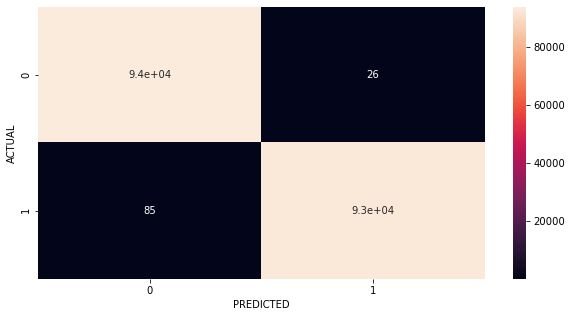

In [145]:
# CONFUSION MATRIX FOR TRAINING DATASET
plt.figure(figsize = (10, 5))
sns.heatmap(confusion_matrix(y_train, dtree_clf.predict(x_train)), annot = True)
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

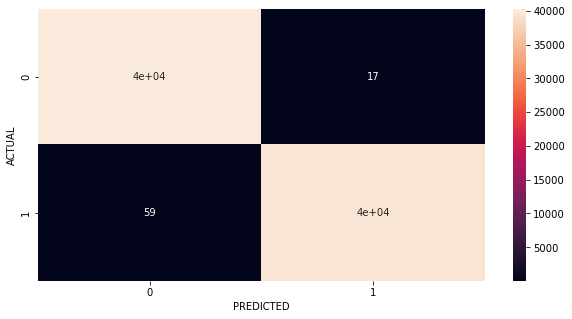

In [151]:
# CONFUSION MATRIX FOR TESTING DATASET
plt.figure(figsize = (10, 5))
sns.heatmap(confusion_matrix(y_test, dtree_clf.predict(x_test)), annot = True)
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

In [83]:
# CLASSIFICATION REPORT FOR TRAINING DATASET
print(classification_report(y_train, dtree_clf.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93698
           1       1.00      1.00      1.00     92752

    accuracy                           1.00    186450
   macro avg       1.00      1.00      1.00    186450
weighted avg       1.00      1.00      1.00    186450



In [84]:
# CLASSIFICATION REPORT FOR TESTING DATASET
print(classification_report(y_test, dtree_clf.predict(x_test)))  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40282
           1       1.00      1.00      1.00     39626

    accuracy                           1.00     79908
   macro avg       1.00      1.00      1.00     79908
weighted avg       1.00      1.00      1.00     79908



### CREATING A FEATURE ATTACK_TYPE TO SPECIFY TYPE OF ATTACK

In [85]:
attack_back['attack_type'] = np.where(attack_back['anomaly'] == 0, 'normal', 'back')

In [86]:
attack_back_bufferoverflow['attack_type'] = np.where(attack_back_bufferoverflow['anomaly'] == 0, 'normal', 'bufferoverflow')

In [87]:
attack_back_guesspassword['attack_type'] = np.where(attack_back_guesspassword['anomaly'] == 0, 'normal', 'guesspassword')

In [88]:
attack_back_neptune['attack_type'] = np.where(attack_back_neptune['anomaly'] == 0, 'normal', 'neptune')

In [89]:
attack_back_nmap['attack_type'] = np.where(attack_back_nmap['anomaly'] == 0, 'normal', 'nmap')

In [90]:
attack_back_normal['attack_type'] = np.where(attack_back_normal['anomaly'] == 0, 'normal', 'attack_normal')

In [91]:
attack_back_portsweep['attack_type'] = np.where(attack_back_portsweep['anomaly'] == 0, 'normal', 'portsweep')

In [92]:
attack_back_satan['attack_type'] = np.where(attack_back_satan['anomaly'] == 0, 'normal', 'satan')

### CONCATENATING ALL THE MODIFIED DATASETS

In [93]:
network_intrusion = pd.concat([attack_back, attack_back_bufferoverflow, attack_back_guesspassword, attack_back_neptune, attack_back_nmap, attack_back_normal, attack_back_portsweep, attack_back_satan], axis = 0)

In [94]:
network_intrusion.head()

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,srv_count,srv_diff_host_rate,srv_error_rate,srv_rerror_rate,su_attempted,urgent,wrong_fragment,anomaly,attack_type,flag
0,0.001,0.0,0.08314,0.001,0.0,0.0,0.100,0.1,0.0,0.001,...,0.002,0.100,0.0,0.050,0.0,0.0,0,0,normal,NaN
1,0.002,0.0,0.08314,0.002,0.0,0.0,0.050,0.1,0.0,0.002,...,0.003,0.067,0.0,0.033,0.0,0.0,0,0,normal,NaN
2,0.003,0.0,0.08314,0.003,0.0,0.0,0.033,0.1,0.0,0.003,...,0.004,0.050,0.0,0.025,0.0,0.0,0,0,normal,NaN
3,0.004,0.0,0.08314,0.004,0.0,0.0,0.025,0.1,0.0,0.004,...,0.004,0.000,0.0,0.000,0.0,0.0,0,0,normal,NaN
4,0.004,0.0,0.08314,0.005,0.0,0.0,0.020,0.1,0.0,0.005,...,0.004,0.000,0.0,0.000,0.0,0.0,0,0,normal,NaN


In [95]:
network_intrusion.drop(['flag'], axis = 1, inplace = True)

#### ENCODING ATTACK_TYPE VARIABLE FOR CREATING MULTICLASS CLASSIFICATION MODEL

In [96]:
network_intrusion['attack_type_encoded'] = np.where(network_intrusion['attack_type'] == 'normal', 0, 
                                           np.where(network_intrusion['attack_type'] == 'back', 1,
                                           np.where(network_intrusion['attack_type'] == 'bufferoverflow', 2,
                                           np.where(network_intrusion['attack_type'] == 'guesspassword', 3,
                                           np.where(network_intrusion['attack_type'] == 'neptune', 4,
                                           np.where(network_intrusion['attack_type'] == 'nmap', 5,
                                           np.where(network_intrusion['attack_type'] == 'attack_normal', 6,
                                           np.where(network_intrusion['attack_type'] == 'portsweep', 7, 8))))))))

In [97]:
network_intrusion['attack_type_encoded'].nunique()

9

In [98]:
network_intrusion['attack_type_encoded'].value_counts()

0    133980
4    111111
6     12933
8      3169
7      2957
5      1257
1       871
3        51
2        29
Name: attack_type_encoded, dtype: int64

In [99]:
network_intrusion.head(50)

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,srv_count,srv_diff_host_rate,srv_error_rate,srv_rerror_rate,su_attempted,urgent,wrong_fragment,anomaly,attack_type,attack_type_encoded
0,0.001,0.0,0.08314,0.001,0.0,0.000,0.100,0.1,0.0,0.001,...,0.002,0.100,0.0,0.050,0.0,0.0,0,0,normal,0
1,0.002,0.0,0.08314,0.002,0.0,0.000,0.050,0.1,0.0,0.002,...,0.003,0.067,0.0,0.033,0.0,0.0,0,0,normal,0
2,0.003,0.0,0.08314,0.003,0.0,0.000,0.033,0.1,0.0,0.003,...,0.004,0.050,0.0,0.025,0.0,0.0,0,0,normal,0
3,0.004,0.0,0.08314,0.004,0.0,0.000,0.025,0.1,0.0,0.004,...,0.004,0.000,0.0,0.000,0.0,0.0,0,0,normal,0
4,0.004,0.0,0.08314,0.005,0.0,0.000,0.020,0.1,0.0,0.005,...,0.004,0.000,0.0,0.000,0.0,0.0,0,0,normal,0
5,0.005,0.0,0.08314,0.006,0.0,0.000,0.017,0.1,0.0,0.006,...,0.005,0.000,0.0,0.000,0.0,0.0,0,0,normal,0
6,0.004,0.0,0.08314,0.007,0.0,0.014,0.014,0.1,0.0,0.007,...,0.004,0.000,0.0,0.025,0.0,0.0,0,1,back,1
7,0.005,0.0,0.08314,0.008,0.0,0.012,0.012,0.1,0.0,0.008,...,0.005,0.000,0.0,0.020,0.0,0.0,0,0,normal,0
8,0.005,0.0,0.08314,0.009,0.0,0.011,0.011,0.1,0.0,0.009,...,0.005,0.000,0.0,0.020,0.0,0.0,0,0,normal,0
9,0.006,0.0,0.08314,0.010,0.0,0.010,0.010,0.1,0.0,0.010,...,0.006,0.000,0.0,0.017,0.0,0.0,0,0,normal,0


In [100]:
# SPLITTING THE DATA INTO TRAINING AND TESTING
x_train, x_test, y_train, y_test = train_test_split(network_intrusion[independent_variables], network_intrusion['attack_type_encoded'], test_size = 0.3, random_state = 123, shuffle = True)

In [101]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((186450, 40), (79908, 40), (186450,), (79908,))

In [102]:
y_train.value_counts()

0    93698
4    77832
6     9065
8     2240
7     2039
5      902
1      623
3       34
2       17
Name: attack_type_encoded, dtype: int64

In [103]:
y_test.value_counts()

0    40282
4    33279
6     3868
8      929
7      918
5      355
1      248
3       17
2       12
Name: attack_type_encoded, dtype: int64

### BUILDING A RANDOM FOREST CLASSIFIER FOR MULTICLASS CLASSIFICATION

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
param_grid = { 'n_estimators': range(8, 15)}

In [106]:
rf_model = GridSearchCV(RandomForestClassifier( random_state = 123 ), 
                        param_grid, 
                        cv = 10,
                        verbose = 10, 
                        scoring = 'accuracy',
                        n_jobs = -1 ).fit(x_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [107]:
rf_model.best_estimator_

RandomForestClassifier(n_estimators=13, random_state=123)

In [108]:
rf_model.best_params_

{'n_estimators': 13}

In [109]:
rf_model.best_score_

0.99916867792974

In [110]:
# TRAINING AND TESTING ACCURACY
print(accuracy_score(y_train, rf_model.predict(x_train)))
print(accuracy_score(y_test, rf_model.predict(x_test)))

0.9999570930544381
0.99911147819993


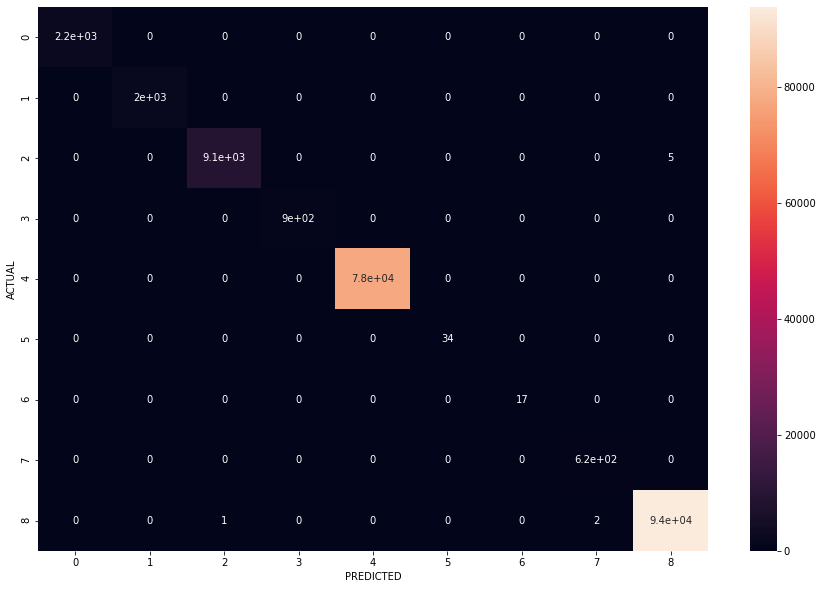

In [111]:
# CONFUSION MATRIX FOR TRAINING DATASET
plt.figure(figsize = (15, 10))
sns.heatmap(confusion_matrix(y_train, rf_model.predict(x_train))[::-1, ::-1], annot = True)
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

In [112]:
# CLASSIFICATION REPORT FOR TRAINING DATASET
print(classification_report(y_train, rf_model.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93698
           1       1.00      1.00      1.00       623
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00     77832
           5       1.00      1.00      1.00       902
           6       1.00      1.00      1.00      9065
           7       1.00      1.00      1.00      2039
           8       1.00      1.00      1.00      2240

    accuracy                           1.00    186450
   macro avg       1.00      1.00      1.00    186450
weighted avg       1.00      1.00      1.00    186450



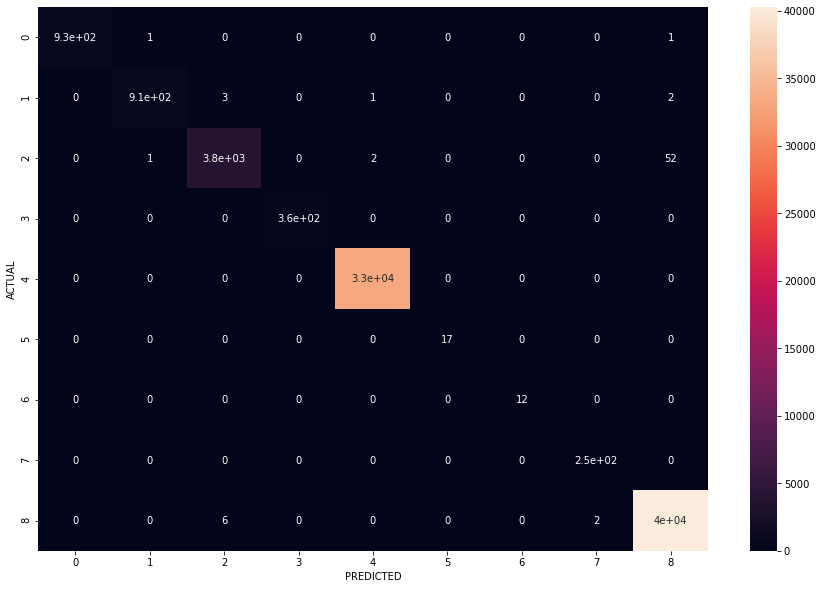

In [113]:
# CONFUSION MATRIX FOR TESTING DATASET
plt.figure(figsize = (15, 10))
sns.heatmap(confusion_matrix(y_test, rf_model.predict(x_test))[::-1, ::-1], annot = True)
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

In [114]:
# CLASSIFICATION REPORT FOR TESTING DATASET
print(classification_report(y_test, rf_model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40282
           1       0.99      1.00      1.00       248
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00     33279
           5       1.00      1.00      1.00       355
           6       1.00      0.99      0.99      3868
           7       1.00      0.99      1.00       918
           8       1.00      1.00      1.00       929

    accuracy                           1.00     79908
   macro avg       1.00      1.00      1.00     79908
weighted avg       1.00      1.00      1.00     79908

